### Weather wise 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
# Read the CSV dataset
data = pd.read_csv("3Districts_Crop.csv")

In [3]:
print(data.head())

    State_Name District_Name  Crop_Year       Season        Crop  Area  \
0  West Bengal        HOWRAH       2009  Autumn             Rice  3652   
1  West Bengal        HOWRAH       2009  Kharif       Dry ginger    41   
2  West Bengal        HOWRAH       2009  Kharif             Jute  6220   
3  West Bengal        HOWRAH       2009  Kharif            Maize    77   
4  West Bengal        HOWRAH       2009  Kharif        Sunflower    53   

   Production  Temperature  Rainfall  Humidity  Sun hours  
0      8259.0         27.0     395.0      85.0        8.0  
1        62.0         28.0    1369.0      85.0        8.5  
2    108127.0         28.0    1369.0      85.0        8.5  
3        78.0         28.0    1369.0      85.0        8.5  
4        43.0         28.0    1369.0      85.0        8.5  


In [4]:
print(data.describe())

         Crop_Year           Area    Production  Temperature     Rainfall  \
count   814.000000     814.000000  8.110000e+02   814.000000   814.000000   
mean   2013.836609   18160.038084  2.754368e+05    25.689484   685.263636   
std       3.134004   58582.947273  2.067998e+06     4.197005   601.713498   
min    2009.000000       1.000000  1.000000e+00    16.400000    42.000000   
25%    2011.000000      41.250000  5.150000e+01    21.925000   205.000000   
50%    2014.000000     272.500000  4.990000e+02    26.300000   263.000000   
75%    2017.000000    4340.250000  1.691100e+04    28.500000  1342.000000   
max    2019.000000  429698.000000  3.092200e+07    36.400000  1769.000000   

         Humidity   Sun hours  
count  814.000000  814.000000  
mean    72.513034    8.975491  
std      8.180114    0.491879  
min     53.000000    7.800000  
25%     67.000000    8.600000  
50%     70.600000    9.100000  
75%     80.000000    9.300000  
max     94.200000   10.100000  


In [5]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'Temperature', 'Rainfall', 'Humidity', 'Sun hours'],
      dtype='object')

In [6]:
data['Crop'].unique()

array(['Rice', 'Dry ginger', 'Jute', 'Maize', 'Sunflower', 'Urad', 'Gram',
       'Khesari', 'Masoor', 'Peas & beans (Pulses)', 'Rapeseed &Mustard',
       'Wheat', 'Moong(Green Gram)', 'Coconut ', 'Dry chillies',
       'Groundnut', 'Potato', 'Sesamum', 'Sugarcane', 'Turmeric',
       'Arecanut', 'Mesta', 'Cotton(lint)', 'Garlic', 'Sannhamp',
       'Horse-gram', 'Arhar/Tur', 'Soyabean', 'Linseed', 'Safflower',
       'Other Kharif pulses', 'Barley', 'Other  Rabi pulses'],
      dtype=object)

#### Handling missing values

In [7]:
# Check for missing values
print(data.isnull().sum()) 

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       3
Temperature      0
Rainfall         0
Humidity         0
Sun hours        0
dtype: int64


In [8]:
# Dropping rows with missing values
data.dropna(inplace=True)

In [9]:
print(data.isnull().sum())

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
Temperature      0
Rainfall         0
Humidity         0
Sun hours        0
dtype: int64


#### Feature Engineering

In [10]:
data['Temp_Rainfall_Ratio'] = data['Temperature'] / data['Rainfall']
data['Humidity_SunRatio'] = data['Humidity'] / data['Sun hours']

In [11]:
# Encode categorical variables
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical = encoder.fit_transform(data[['Season', 'Crop']])

In [12]:
# Create column names for the encoded features
season_columns = [f'Season_{cat}' for cat in encoder.categories_[0]]
crop_columns = [f'Crop_{cat}' for cat in encoder.categories_[1]]
encoded_columns = season_columns + crop_columns

In [13]:
# Create DataFrame for the encoded features
encoded_df = pd.DataFrame(encoded_categorical, columns=encoded_columns)

In [14]:
# Concatenate the encoded features with the original dataframe
data = pd.concat([data.reset_index(drop=True), encoded_df], axis=1)

In [15]:
# Drop original categorical columns and redundant columns
data.drop(columns=['Season', 'Crop', 'State_Name', 'District_Name'], inplace=True)

In [16]:
# Normalize/standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

In [17]:
# Convert scaled features back to DataFrame
data = pd.DataFrame(scaled_features, columns=data.columns)

#### Visualization

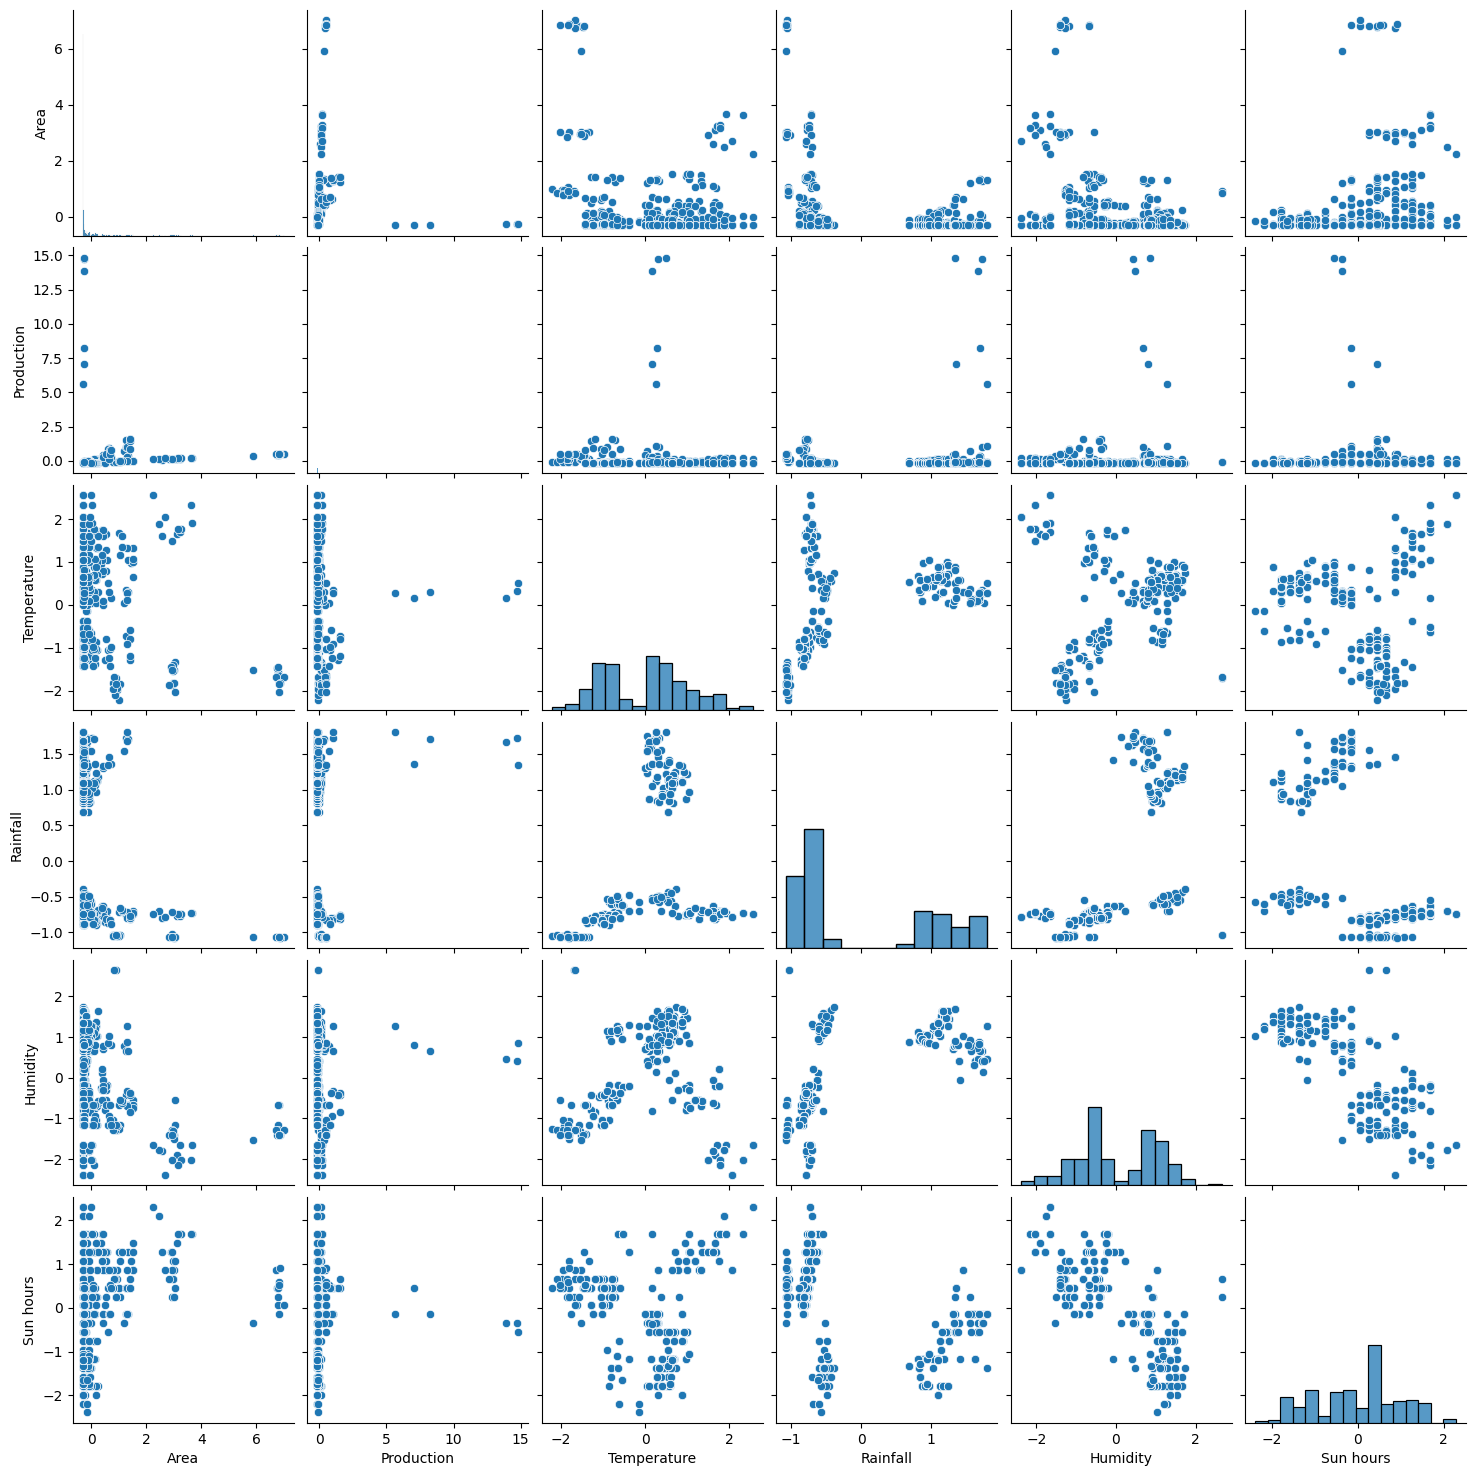

In [18]:
## Pairplot - relationships between variables using pairplot.
sns.pairplot(data, vars=["Area", "Production", "Temperature", "Rainfall", "Humidity", "Sun hours"])
plt.show()

In [19]:
# Assuming 'numerical_features' is a list of numerical column names in your dataset
numerical_features = ['Production', 'Temperature', 'Rainfall', 'Humidity', 'Sun hours', 'Temp_Rainfall_Ratio', 'Humidity_SunRatio']

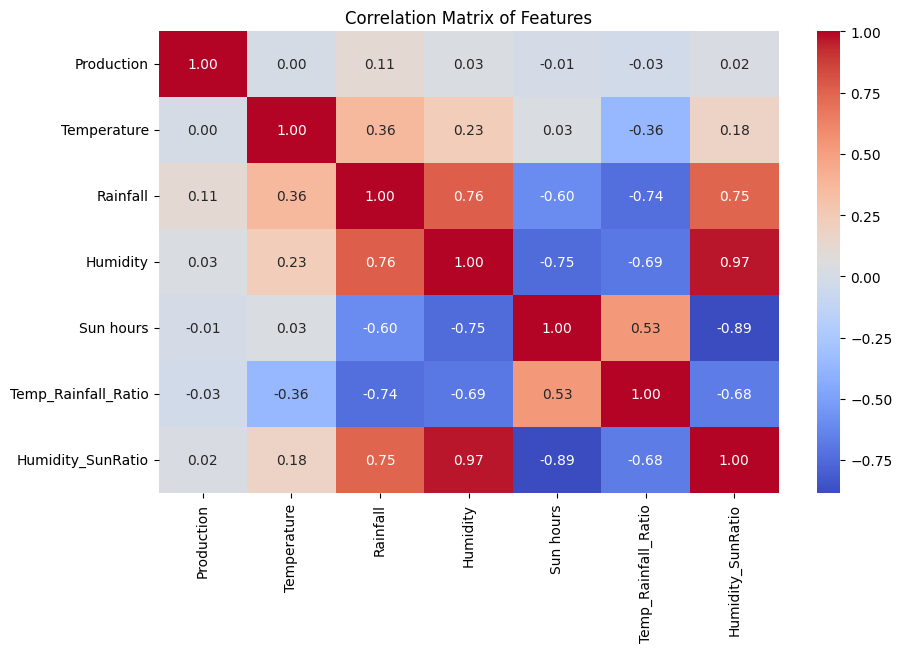

In [20]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
correlation = data[numerical_features].corr()
sns.heatmap(correlation, cmap="coolwarm", annot=True, fmt=".2f")  # Add annotations with 2 decimal places
plt.title("Correlation Matrix of Features")
plt.show()

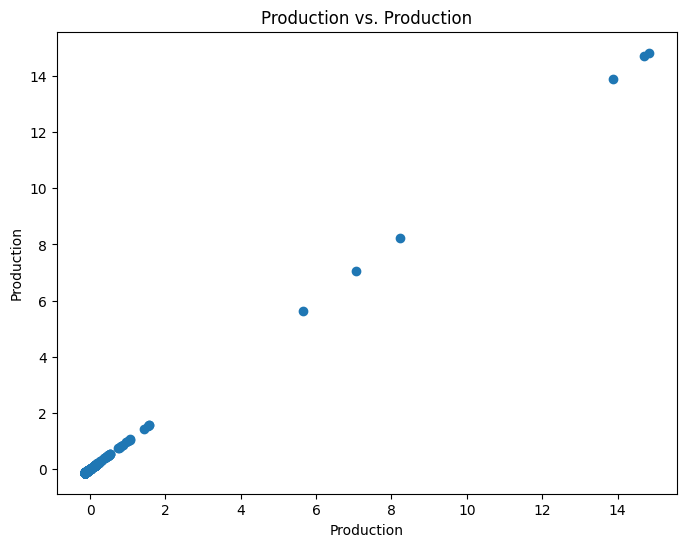

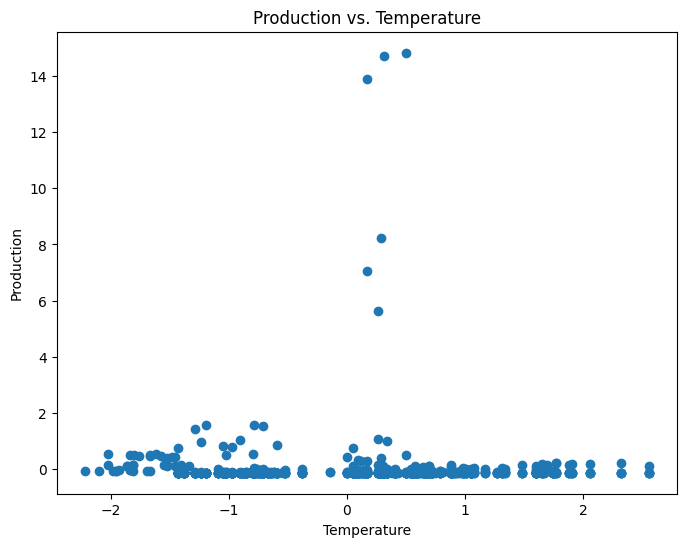

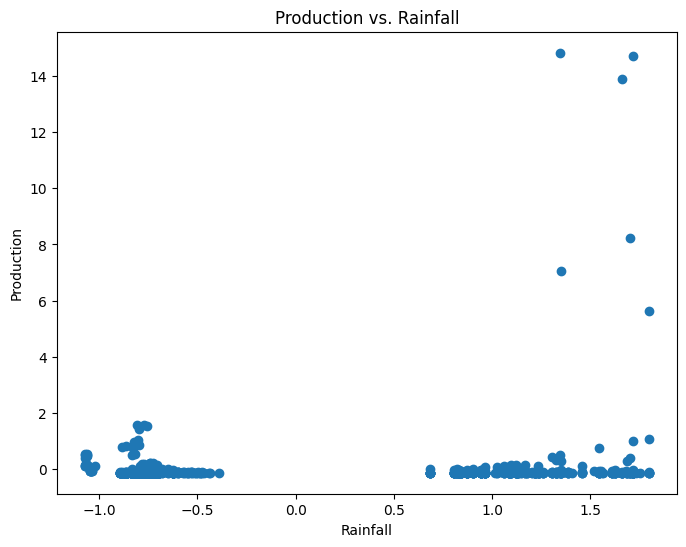

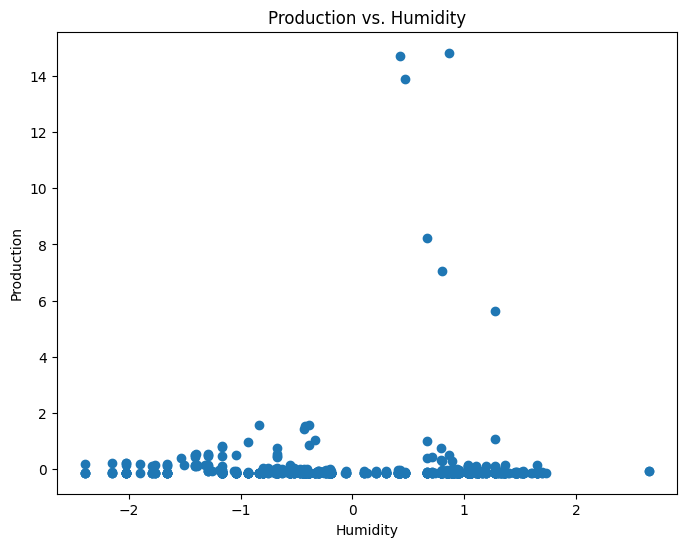

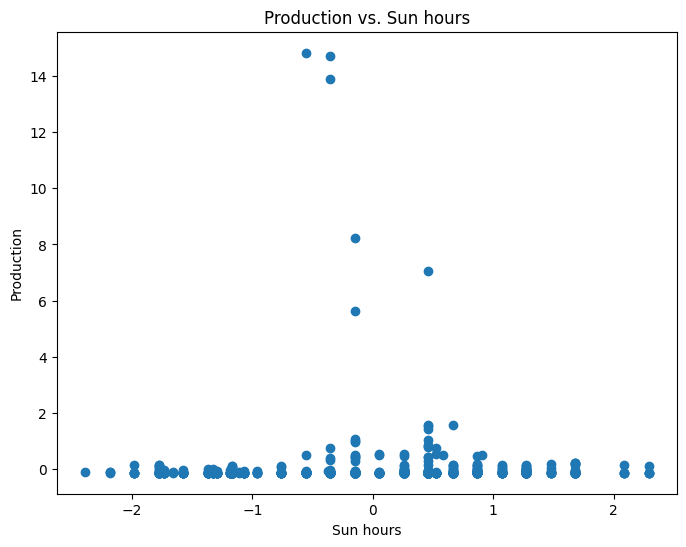

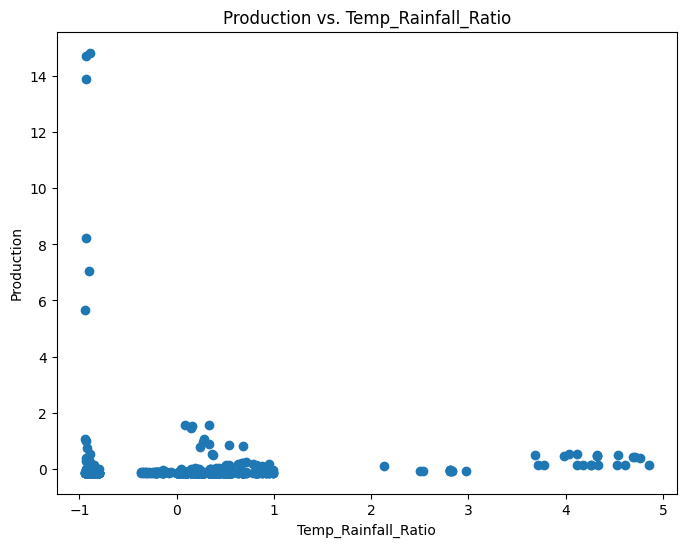

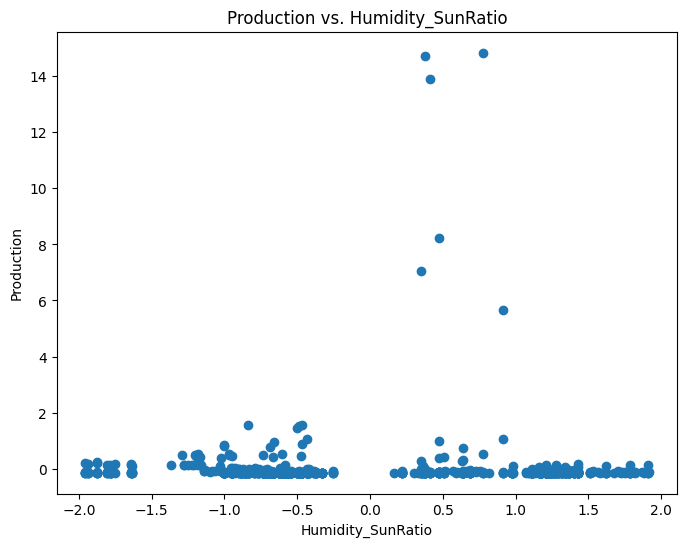

In [21]:
# **Scatter Plots (Production vs. other features)**
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[feature], data["Production"])
    plt.xlabel(feature)
    plt.ylabel("Production")
    plt.title(f"Production vs. {feature}")
    plt.show()

<Figure size 1200x600 with 0 Axes>

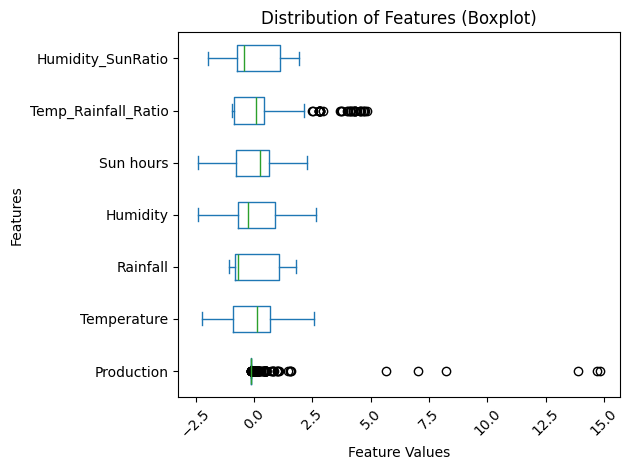

In [22]:
# **Boxplots (numerical features)**
plt.figure(figsize=(12, 6))
data[numerical_features].plot(kind="box", vert=False)
plt.xlabel("Feature Values")
plt.ylabel("Features")
plt.title("Distribution of Features (Boxplot)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust spacing between elements
plt.show()

In [23]:
numerical_features = ['Temperature', 'Rainfall', 'Humidity', 'Sun hours']

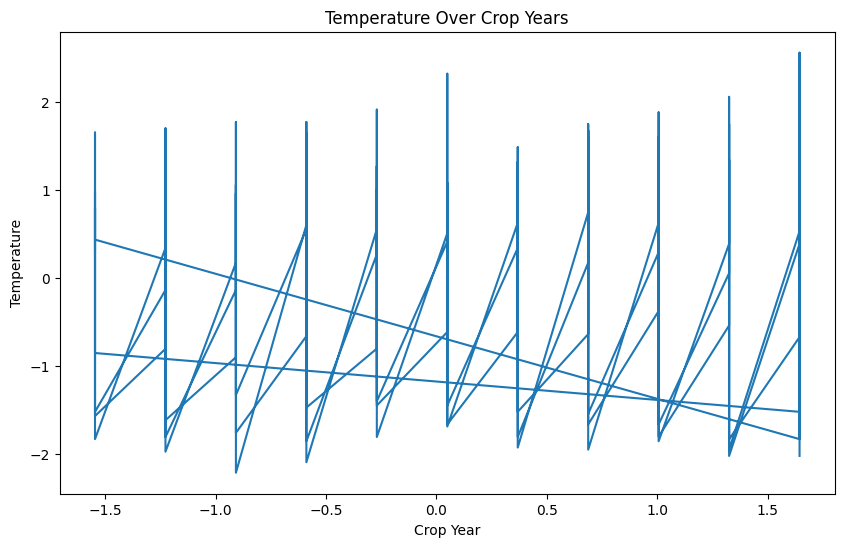

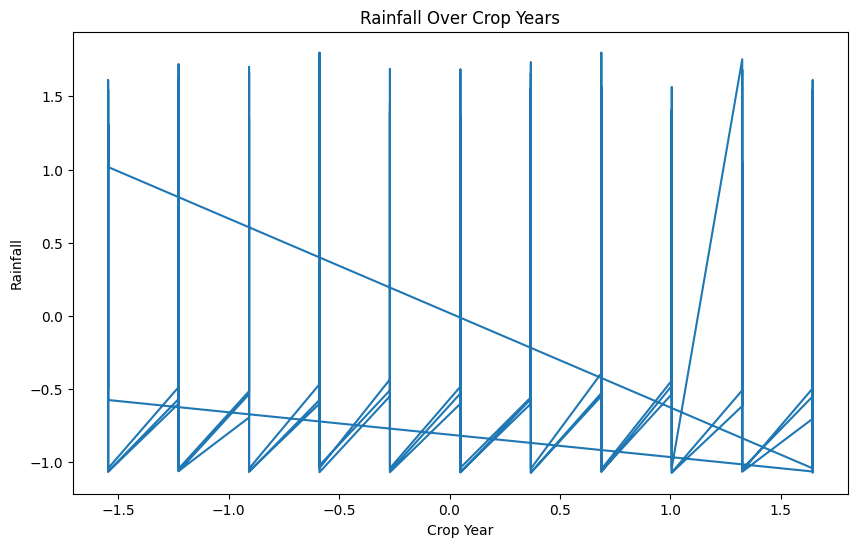

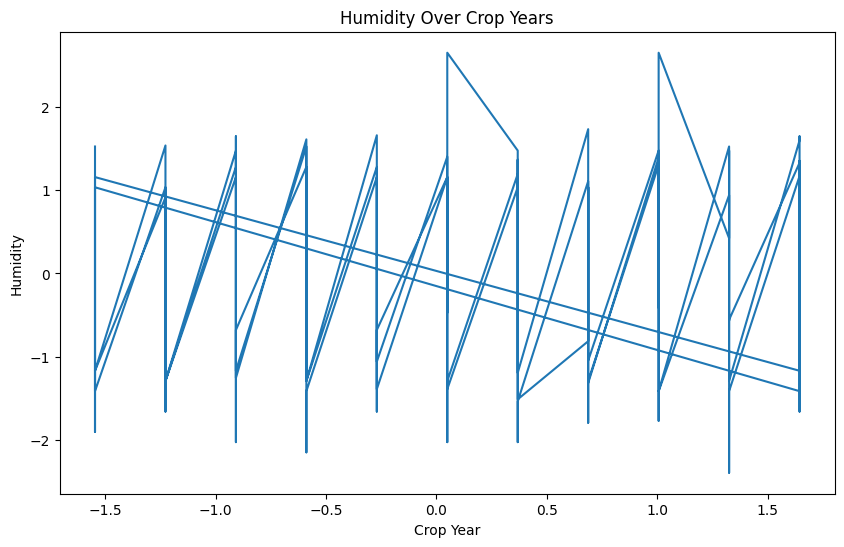

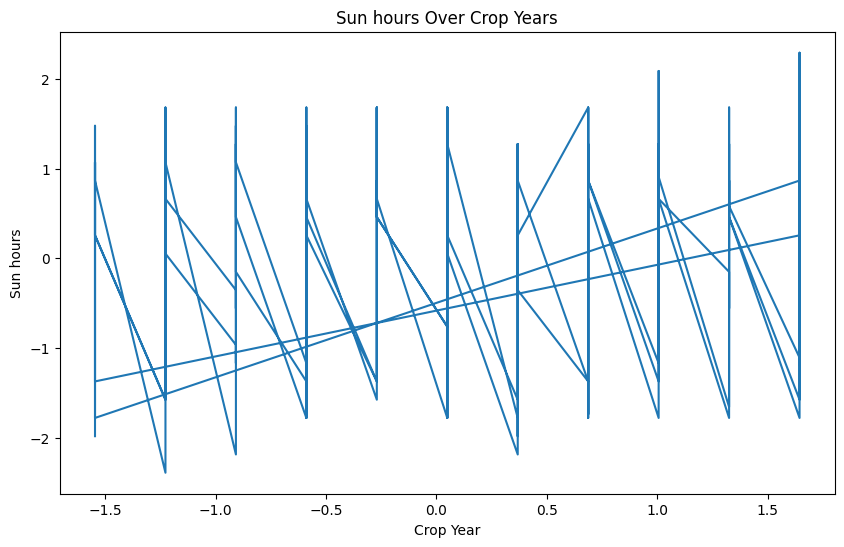

In [24]:
# **Line Plots for Weather Parameters over Years **
if "Crop_Year" in data.columns:
    for feature in numerical_features:
        plt.figure(figsize=(10, 6))
        plt.plot(data["Crop_Year"], data[feature])
        plt.xlabel("Crop Year")
        plt.ylabel(feature)
        plt.title(f"{feature} Over Crop Years")
        plt.show()

In [25]:
from scipy.stats import zscore

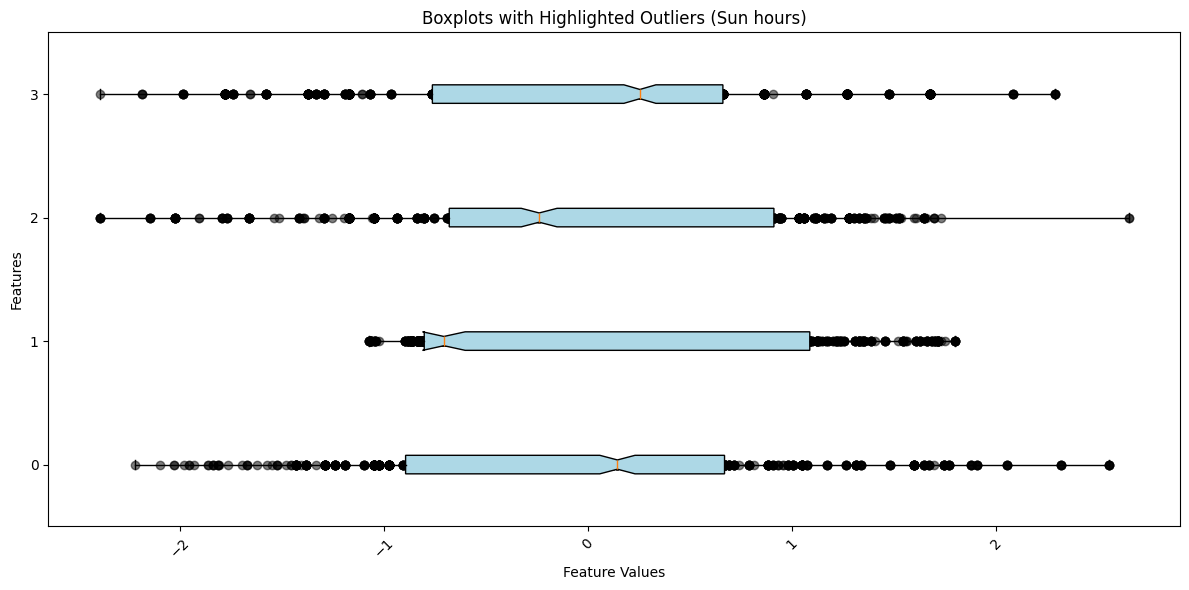

In [26]:
# Function to detect outliers using Z-score
def detect_outliers_zscore(data, feature, threshold=3):
    mean = data[feature].mean()
    std = data[feature].std()
    z_scores = (data[feature] - mean) / std
    outliers = data[abs(z_scores) > threshold]
    return outliers  # Return the identified outliers

# If 'Temp_Range' is created, include it in numerical features
if "Temp_Range" in data.columns:
    numerical_features.append("Temp_Range")

# Plotting box plots with highlighted outliers
plt.figure(figsize=(12, 6))

for i, feature in enumerate(numerical_features):
    outliers = detect_outliers_zscore(data.copy(), feature)  # Call the function to detect outliers
    box = plt.boxplot(data[feature], vert=False, notch=True, patch_artist=True, positions=[i])
    
    # Customize box color (optional)
    box["boxes"][0].set_facecolor("lightblue")
    
    # Plot inliers and outliers
    fliers = data[~data[feature].isin(outliers[feature])]
    plt.scatter(fliers[feature], [i] * len(fliers), marker="o", color="black", alpha=0.5)  # Plot inliers
    plt.scatter(outliers[feature], [i] * len(outliers), marker="x", color="red", alpha=0.5)  # Plot outliers
    
    # Set labels and title
    plt.xlabel("Feature Values")
    plt.ylabel("Features")
    plt.title(f"Boxplots with Highlighted Outliers ({feature})")
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

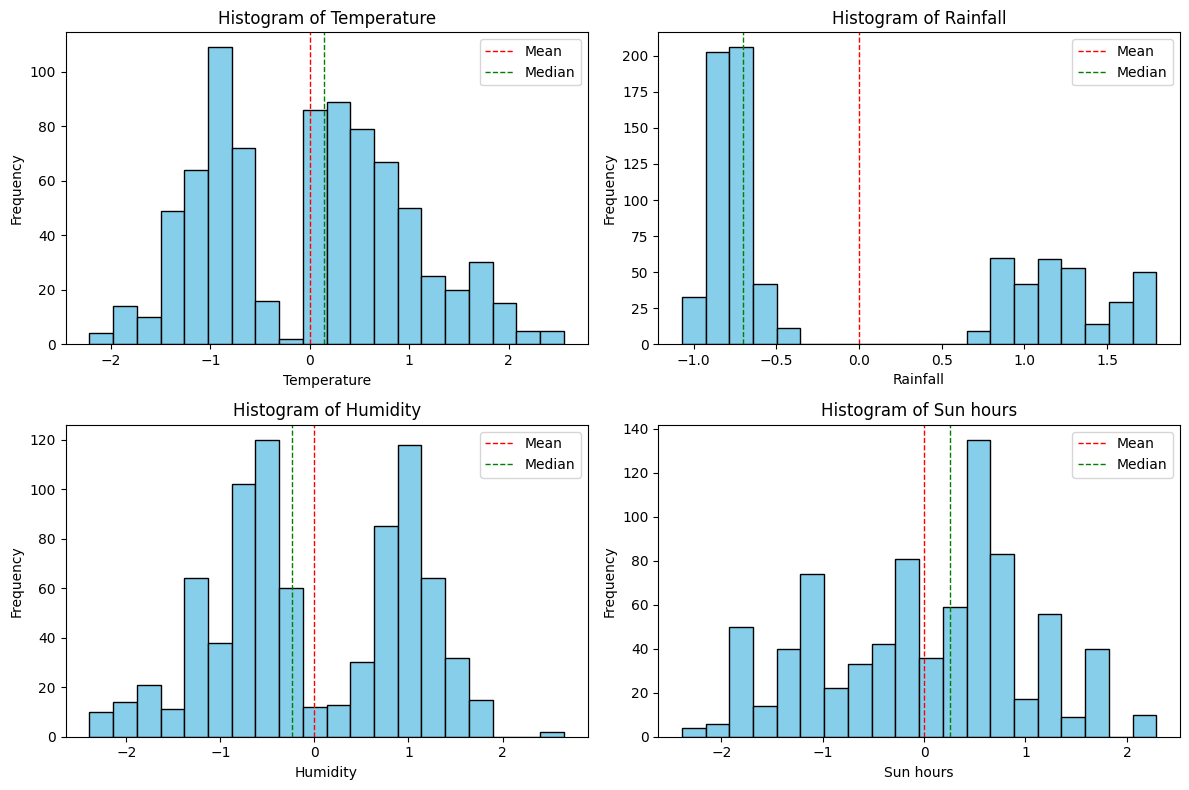

In [27]:
if "Temp_Range" in data.columns:
    numerical_features.append("Temp_Range")

# Plot histograms for each numerical feature
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)

for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    plt.hist(data[feature], bins=20, color='skyblue', edgecolor='black')
    plt.axvline(x=data[feature].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(x=data[feature].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

#### Model Building

In [38]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
# Define the XGBoost model
xgb_model = XGBRegressor(random_state=42)

In [40]:
# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

In [41]:
# Calculate R² score and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"XGBoost Regressor:")
print(f"  R² Score: {r2}")
print(f"  Mean Squared Error: {mse}")

XGBoost Regressor:
  R² Score: 0.9877088978843959
  Mean Squared Error: 0.005571782935340833


In [42]:
import joblib

In [43]:
# Save the XGBoost model
joblib.dump(xgb_model, 'xgboost_model.pkl')

# Save the one-hot encoder
joblib.dump(encoder, 'onehot_encoder.pkl')

# Save the standard scaler
joblib.dump(scaler, 'standard_scaler.pkl')

['standard_scaler.pkl']